<a href="https://colab.research.google.com/github/kiranbhusal/Precipitation-forecasting-using-deep-learning/blob/main/cnn_lstm_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install xarray[complete]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.8/202.8 KB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 355.2/355.2 KB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 55.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.9/63.9 KB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 30.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.0/115.0 KB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
import glob
import matplotlib.pyplot as plt
import urllib.request
import xarray as xr

MOdelling by Conv-LSTM

In [3]:
import numpy as np
import netCDF4 as nc
import keras
from keras.layers import Input, Dense, Conv2D, LSTM, Flatten
from keras.models import Model
from keras.layers import Reshape




In [4]:
! pip install rioxarray

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.3/53.3 KB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 60.8 MB/s eta 0:00:00


In [5]:
! pip install cartopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 59.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 KB 6.3 MB/s eta 0:00:00
  Created wheel for cartopy: filename=Cartopy-0.21.1-cp38-cp38-linux_x86_64.whl size=11127980 sha256=9132c6379e7215e0e18d44955d773809b4ccdf1199e8ba1534a824edcd31c095
  Stored in directory: /root/.cache/pip/wheels/7c/ff/6f/09e4aa53f4e67d6498ef1d33dd4ea9c8c165817b9ddcc31d28
Successfully built cartopy


In [6]:
! pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
! pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 81.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 KB 15.1 MB/s eta 0:00:00
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires click<8.0,>=5.1, but you have click 8.1.3 which is incompatible.


In [8]:
! pip install earthpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 24.9 MB/s eta 0:00:00


In [9]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# netCDF4 needs to be installed in your environment for this to work
import xarray as xr
import rioxarray as rxr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import seaborn as sns
import geopandas as gpd
import earthpy as et

# Plotting options
sns.set(font_scale=1.3)
sns.set_style("white")

In [11]:
# Load the netCDF data
ds0001 = xr.open_dataset('/content/sample.nc', decode_times=False)
data = ds0001.variables['hourlyPrecipRate'][:].astype(np.float32)



In [12]:
ds0001

<xarray.Dataset>
Dimensions:             (Time: 48, Latitude: 1800, Longitude: 3600)
Coordinates:
  * Time                (Time) int32 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
  * Latitude            (Latitude) float32 -89.95 -89.85 -89.75 ... 89.85 89.95
  * Longitude           (Longitude) float32 -179.9 -179.9 -179.8 ... 179.9 179.9
Data variables:
    hourlyPrecipRate    (Time, Latitude, Longitude) float32 ...
    hourlyPrecipRateGC  (Time, Latitude, Longitude) float32 ...
Attributes:
    title:        GSMaP_NOW_V8
    institution:  JAXA/EORC

In [13]:
data

<xarray.Variable (Time: 48, Latitude: 1800, Longitude: 3600)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Attributes:
    long_name:  precip_now
    units:      mm/h

In [14]:
data_crs=ds0001.rio.crs
data_crs

In [ ]:
metadata= ds0001.attrs
metadata

{'title': 'GSMaP_NOW_V8', 'institution': 'JAXA/EORC'}

In [15]:
#getting data of a point from Nepal

from xarray.core.computation import SLICE_NONE
#start_date = "2000-01-01"
#end_date = "2005-01-01"
data = ds0001["hourlyPrecipRate"].sel(
                                                    Latitude=28,
                                                    Longitude=84, method= 'nearest' )
data

<xarray.DataArray 'hourlyPrecipRate' (Time: 48)>
[48 values with dtype=float32]
Coordinates:
  * Time       (Time) int32 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0 0
    Latitude   float32 28.05
    Longitude  float32 84.05
Attributes:
    long_name:  precip_now
    units:      mm/h

In [16]:
data.shape

(48,)

In [17]:
data.values

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.03335836,  0.08752912,  0.13417076,  0.385     ,  0.305     ,
        0.        ,  0.29541695,  0.3090605 ,  0.3790605 ,  0.25      ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , 10.260062  ,
       18.95963   , 16.057775  , 13.195232  ], dtype=float32)

In [30]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense



# Replace NaN values with 0
precipitation_data = np.nan_to_num(data, 0)



In [19]:
precipitation_data

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.03335836,  0.08752912,  0.13417076,  0.385     ,  0.305     ,
        0.        ,  0.29541695,  0.3090605 ,  0.3790605 ,  0.25      ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , 10.260062  ,
       18.95963   , 16.057775  , 13.195232  ], dtype=float32)

In [20]:
precipitation_data.shape

(48,)

In [31]:
# Preprocess the precipitation data
scaler = MinMaxScaler(feature_range=(0, 1))
precipitation_data = scaler.fit_transform(precipitation_data.reshape(-1, 1))

In [32]:
# Split the data into training and test sets
training_data = precipitation_data[:int(0.8 * len(precipitation_data))]
test_data = precipitation_data[int(0.8 * len(precipitation_data)):]

In [92]:
# Convert the data into a format suitable for input into an LSTM network
def create_dataset(data, look_back=1):
    data_X, data_Y = [], []
    for i in range(len(data) - look_back):
        a = data[i:(i + look_back), 0]
        data_X.append(a)
        data_Y.append(data[i + look_back, 0])
    return np.array(data_X), np.array(data_Y)


In [93]:
look_back = 1
training_X, training_Y = create_dataset(training_data, look_back)
test_X, test_Y = create_dataset(test_data, look_back)

In [94]:
# Define the LSTM network architecture
model = Sequential()
model.add(LSTM(32, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer="adam", metrics='accuracy')


In [96]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 32)                4352      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________


In [97]:
# Train the LSTM network
training_X = np.reshape(training_X, (training_X.shape[0], look_back, 1))


In [98]:
model.fit(training_X, training_Y, epochs=100, batch_size=32, verbose=2)

Epoch 1/100
2/2 - 4s - loss: 4.7831e-05 - accuracy: 0.7568 - 4s/epoch - 2s/step
Epoch 2/100
2/2 - 0s - loss: 3.9322e-05 - accuracy: 0.7568 - 17ms/epoch - 9ms/step
Epoch 3/100
2/2 - 0s - loss: 4.0868e-05 - accuracy: 0.7568 - 17ms/epoch - 8ms/step
Epoch 4/100
2/2 - 0s - loss: 3.8889e-05 - accuracy: 0.7568 - 22ms/epoch - 11ms/step
Epoch 5/100
2/2 - 0s - loss: 3.8948e-05 - accuracy: 0.7568 - 17ms/epoch - 9ms/step
Epoch 6/100
2/2 - 0s - loss: 3.8818e-05 - accuracy: 0.7568 - 22ms/epoch - 11ms/step
Epoch 7/100
2/2 - 0s - loss: 3.7912e-05 - accuracy: 0.7568 - 17ms/epoch - 8ms/step
Epoch 8/100
2/2 - 0s - loss: 3.8588e-05 - accuracy: 0.7568 - 20ms/epoch - 10ms/step
Epoch 9/100
2/2 - 0s - loss: 3.8736e-05 - accuracy: 0.7568 - 17ms/epoch - 8ms/step
Epoch 10/100
2/2 - 0s - loss: 3.7968e-05 - accuracy: 0.7568 - 17ms/epoch - 9ms/step
Epoch 11/100
2/2 - 0s - loss: 3.7865e-05 - accuracy: 0.7568 - 17ms/epoch - 9ms/step
Epoch 12/100
2/2 - 0s - loss: 3.7759e-05 - accuracy: 0.7568 - 18ms/epoch - 9ms/step
E

In [38]:
# Make precipitation forecasts
test_X = np.reshape(test_X, (test_X.shape[0], look_back, 1))
forecasts = model.predict(test_X)
forecasts = scaler.inverse_transform(forecasts)

1/1 [==============================] - 0s 406ms/step


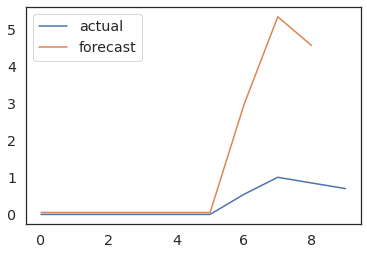

In [39]:
# Evaluate the performance of the LSTM network
plt.plot(test_data, label="actual")
plt.plot(forecasts, label="forecast")
plt.legend()
plt.show()

In [55]:
# make predictions
train_predict = model.predict(training_X)
test_predict = model.predict(test_X)

# show the predicted values
print(train_predict)


1/1 [==============================] - 0s 22ms/step
[[0.00274775]
 [0.00274775]
 [0.00274775]
 [0.00274775]
 [0.00274775]
 [0.00274775]
 [0.00274775]
 [0.00274775]
 [0.00274775]
 [0.00274775]
 [0.00274775]
 [0.00274775]
 [0.00274775]
 [0.00274775]
 [0.00274775]
 [0.00274775]
 [0.00274775]
 [0.00274775]
 [0.00274775]
 [0.00274775]
 [0.00274775]
 [0.00274775]
 [0.00274775]
 [0.00274775]
 [0.00274775]
 [0.00324717]
 [0.00405823]
 [0.00475659]
 [0.00851274]
 [0.00731466]
 [0.00274775]
 [0.00717115]
 [0.00737546]
 [0.00842379]
 [0.00649102]
 [0.00274775]
 [0.00274775]]


In [54]:
print(test_predict)

[[0.00274775]
 [0.00274775]
 [0.00274775]
 [0.00274775]
 [0.00274775]
 [0.00274775]
 [0.15575604]
 [0.28078884]
 [0.23985799]]


In [47]:
from tensorflow.keras.models import load_model

# code to train and compile the model goes here

model.save('my_model.h5')  # save the trained model to a file

In [50]:
#Importing the Best model
from tensorflow.keras.models import load_model
model=load_model('/content/my_model.h5')

1-d CNN

In [56]:
#reshaping to the 2D for further calculation
data_for_training= np.array(precipitation_data)
data_for_training=data_for_training.reshape(-1,1)

In [57]:
#Normalizing the dataset
scaler=MinMaxScaler()
scaler.fit(data_for_training)
data_scaled=scaler.transform(data_for_training)
data_scaled


array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.00175944],
       [0.0046166 ],
       [0.00707666],
       [0.0203063 ],
       [0.01608681],
       [0.        ],
       [0.01558137],
       [0.01630098],
       [0.01999303],
       [0.01318591],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.5411531 ],
       [1.        ],
       [0.84694564],
       [0.695

In [58]:
# multi-step data preparation
from numpy import array
def split_sequence(data_scaled, n_past, n_future):
  X, y = list(), list()
  for i in range(len(data_scaled)):
# find the end of this pattern
    end_ix = i + n_past
    out_end_ix = end_ix + n_future
# check if we are beyond the sequence
    if out_end_ix > len(data_scaled):
      break
# gather input and output parts of the pattern
    seq_x, seq_y = data_scaled[i:end_ix], data_scaled[end_ix]
    X.append(seq_x)
    y.append(seq_y)
  return array(X), array(y)
# choose a number of time steps
n_past, n_future = 5, 1
# split into samples
X, y = split_sequence(data_scaled, n_past, n_future)

In [59]:
X,y=np.array(X), np.array(y)
X.shape, y.shape

((43, 5, 1), (43, 1))

In [ ]:
X[:5]

array([[[0.],
        [0.],
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        [0.],
        [0.]]], dtype=float32)

In [ ]:
y[:2]

array([[0.],
       [0.]], dtype=float32)

In [60]:
# Split the data into training, validation, and test sets
num_samples = X.shape[0]
training_samples = int(np.round(num_samples * 0.8))
validation_samples = int(np.round(num_samples * 0.10))
test_samples = num_samples - training_samples - validation_samples

X_train = X[:training_samples,:]
y_train = y[:training_samples]

X_val = X[training_samples:training_samples+validation_samples,:]
y_val = y[training_samples:training_samples+validation_samples]

X_test = X[training_samples+validation_samples:,:]
y_test = y[training_samples+validation_samples:]

In [61]:
X_train.shape

(34, 5, 1)

In [62]:
from keras.models import Sequential
from keras.layers import LSTM,Dense ,Dropout, Bidirectional, TimeDistributed, Conv1D, MaxPooling1D, Flatten
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

In [63]:
# define model
model = Sequential()
model.add(LSTM(128, activation='relu', input_shape=(X.shape[1], X.shape[2]), return_sequences=True))
#model.add(Dropout(0.2))
model.add(LSTM(64, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
#model.add(LSTM(32, activation='relu', return_sequences=False))
#model.add(Dropout(0.2))
model.add(Dense(1,activation='linear'))
model.compile(optimizer= 'adam', loss='mean_squared_error', metrics='accuracy')

In [64]:
model.fit(X, y, epochs=10,batch_size=100)

Epoch 1/10
1/1 [==============================] - 4s 4s/step - loss: 0.0576 - accuracy: 0.6977
Epoch 2/10
1/1 [==============================] - 0s 26ms/step - loss: 0.0564 - accuracy: 0.6977
Epoch 3/10
1/1 [==============================] - 0s 22ms/step - loss: 0.0555 - accuracy: 0.6977
Epoch 4/10
1/1 [==============================] - 0s 24ms/step - loss: 0.0539 - accuracy: 0.6977
Epoch 5/10
1/1 [==============================] - 0s 26ms/step - loss: 0.0532 - accuracy: 0.6977
Epoch 6/10
1/1 [==============================] - 0s 23ms/step - loss: 0.0524 - accuracy: 0.6977
Epoch 7/10
1/1 [==============================] - 0s 24ms/step - loss: 0.0516 - accuracy: 0.6977
Epoch 8/10
1/1 [==============================] - 0s 25ms/step - loss: 0.0504 - accuracy: 0.6977
Epoch 9/10
1/1 [==============================] - 0s 26ms/step - loss: 0.0507 - accuracy: 0.6977
Epoch 10/10
1/1 [==============================] - 0s 22ms/step - loss: 0.0497 - accuracy: 0.6977


2/2 [==============================] - 1s 12ms/step


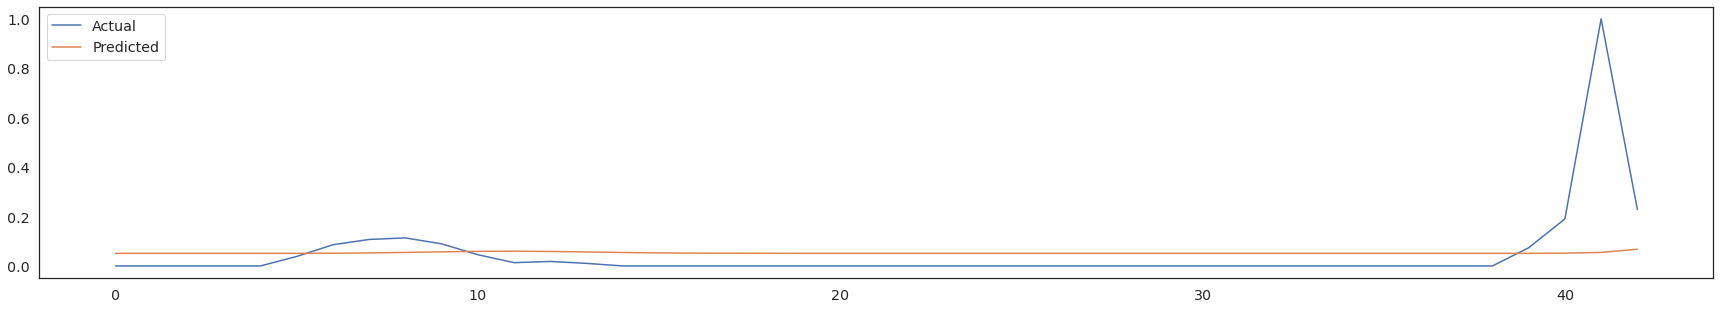

In [ ]:
predictions = model.predict(X)

# Plot the actual values and predictions
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 5))
plt.plot(y, label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.show()

1d- CNN

In [ ]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X.shape[1],X.shape[2])))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics='accuracy')

In [ ]:
model.fit(X,y, epochs=100,batch_size=100)

Epoch 1/100
1/1 [==============================] - 0s 488ms/step - loss: 0.0247 - accuracy: 0.6977
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 0.0238 - accuracy: 0.6977
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 0.0231 - accuracy: 0.6977
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 0.0225 - accuracy: 0.6977
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 0.0220 - accuracy: 0.6977
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 0.0216 - accuracy: 0.6977
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 0.0213 - accuracy: 0.6977
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 0.0211 - accuracy: 0.6977
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 0.0210 - accuracy: 0.6977
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 0.0209 - accuracy: 0.6977
Epoch 11/100
1/1 [=======

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Conv1D, LSTM, Dense

In [ ]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(train_X.shape[1],X.shape[2])))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics='accuracy')

NameError: ignored

In [ ]:
# Make precipitation forecasts
test_X = np.reshape(test_X, (test_X.shape[0], look_back, 1))
forecasts = model.predict(test_X)
forecasts = scaler.inverse_transform(forecasts)